In [1]:
data_path = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"

In [3]:
from Tool_Functions.cleaning_data import * 

from Clustering.new_data_set_all import * 
from Clustering.viualize_datas import * 
from Clustering.new_data_set_all import *

from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import matplotlib.pyplot as plt


In [117]:
new = file_to_dataframe(data_path + "new_abos.csv")
cluster_id = file_to_dataframe(data_path + "Clustering_results/final_partiel/clusters_id_partiel.csv")
cluster_id_all = file_to_dataframe(data_path + "Clustering_results/final_total/clusters_id_all.csv")

1 / graph pour lisibilité
2 / comparer avant et après ODD

In [5]:
dfn = file_to_dataframe(data_path + 'New_abos.csv')
odd = dfn[dfn['DATE_ACTE_REEL'] >= '2023-11-14']
sg = dfn[dfn['DATE_ACTE_REEL'] < '2023-11-14']
pile = dfn[dfn['DATE_ACTE_REEL'] == '2023-11-14']
lejouravant = dfn[dfn['DATE_ACTE_REEL'] == '2023-11-13']


In [4]:
df_repartition_promo = count_abo_conditions(dfn,['DATE_ACTE_REEL'],'ID_ABONNE')
df_repartition_promo

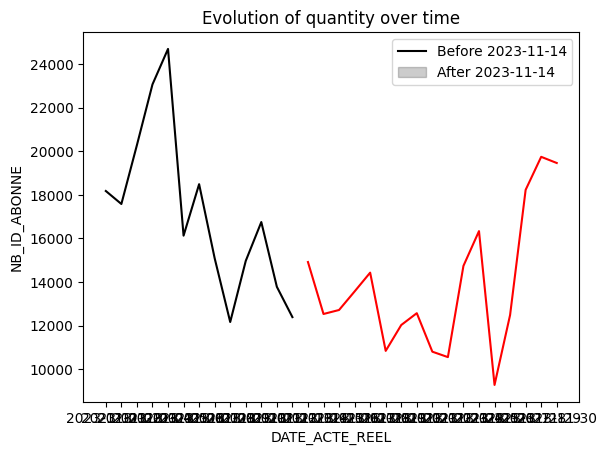

In [155]:
before_date = df_repartition_promo[df_repartition_promo['DATE_ACTE_REEL'] < '2023-11-14']
after_date = df_repartition_promo[df_repartition_promo['DATE_ACTE_REEL'] >= '2023-11-14']

sns.lineplot(x='DATE_ACTE_REEL', y='NB_ID_ABONNE', data=before_date.sort_values(by='DATE_ACTE_REEL'), color='black')
sns.lineplot(x='DATE_ACTE_REEL', y='NB_ID_ABONNE', data=after_date.sort_values(by='DATE_ACTE_REEL'), color='red')

plt.title('Evolution of quantity over time')
plt.xlabel('DATE_ACTE_REEL')
plt.ylabel('NB_ID_ABONNE')
plt.legend(['Before 2023-11-14', 'After 2023-11-14'])
plt.show()

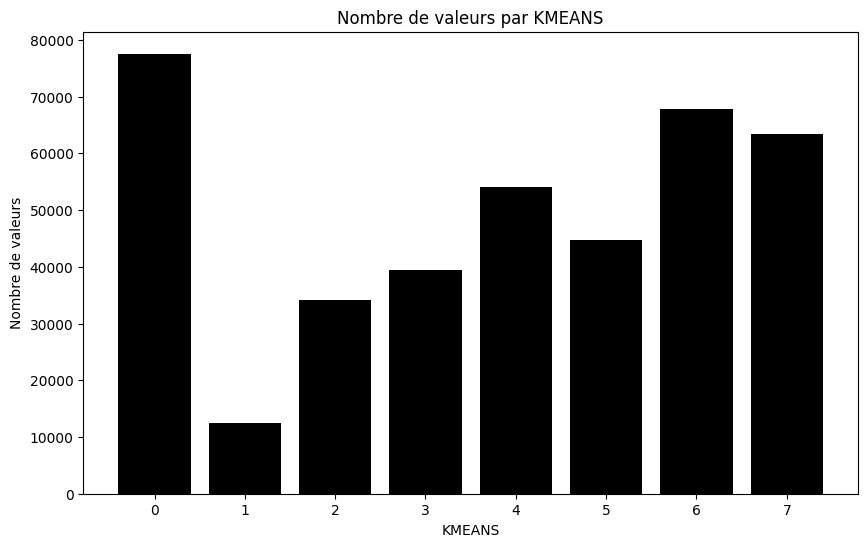

In [94]:
tous = join_dataFrames(dfn, cluster_id_all, 'ID_ABONNE')
total2 = file_to_dataframe(data_path + "total2.csv")
liste = tous.groupby(['KMEANS']).count()
donnees = pd.DataFrame(liste)
donnees['KMEANS2'] = donnees.index

plt.figure(figsize=(10, 6))
plt.bar(donnees['KMEANS2'], donnees['ID_ABONNE'], color='black')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees['KMEANS2'])
plt.show()

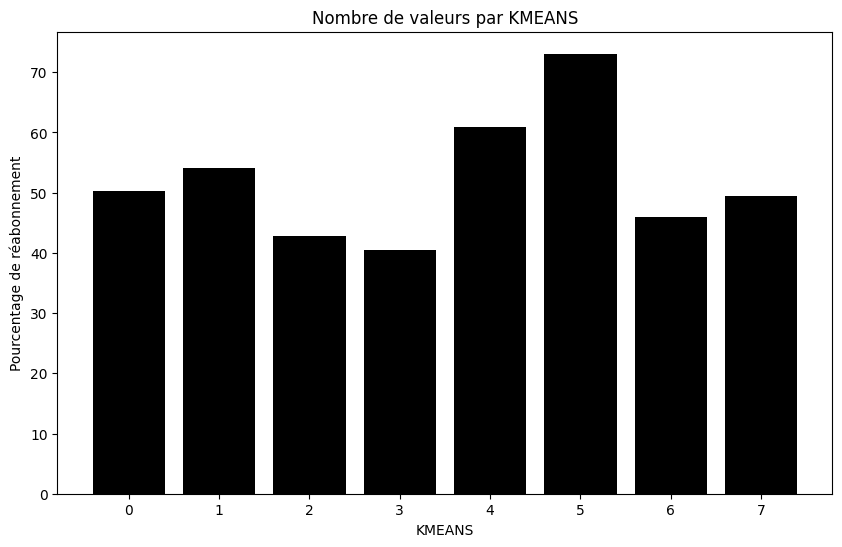

In [103]:
merged_df = pd.merge(donnees, total2, on='KMEANS2', how='left')
merged_df['Percentage'] = (merged_df['ID_ABONNE_x'] / merged_df['ID_ABONNE_y']) * 100

plt.figure(figsize=(10, 6))
plt.bar(merged_df['KMEANS2'], merged_df['Percentage'], color='black')
plt.xlabel('KMEANS')
plt.ylabel('Pourcentage de réabonnement')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(merged_df['KMEANS2'])
plt.show()

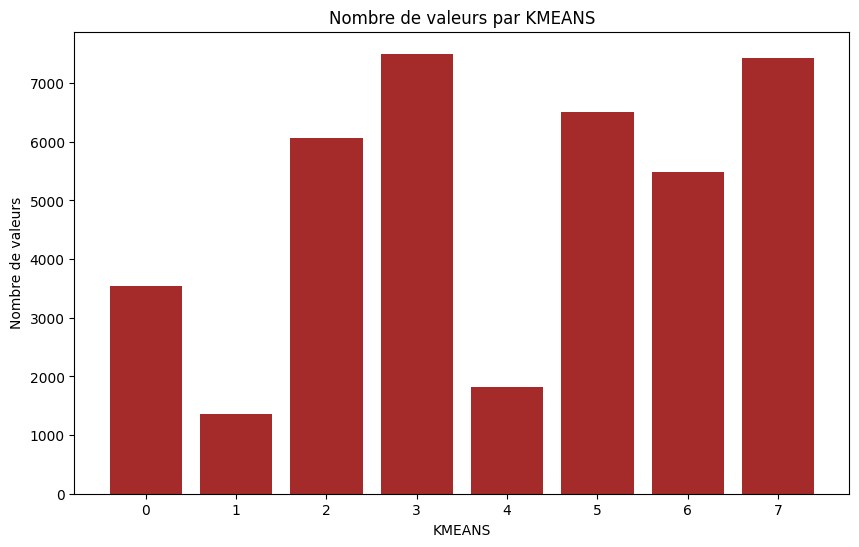

In [122]:
tousp = join_dataFrames(dfn, cluster_id, 'ID_ABONNE')
total1 = file_to_dataframe(data_path + "total1.csv")
liste = tousp.groupby(['Cluster_8']).count()
donneesp = pd.DataFrame(liste)
donneesp['KMEANS'] = donneesp.index

plt.figure(figsize=(10, 6))
plt.bar(donneesp['KMEANS'], donneesp['ID_ABONNE'], color='brown')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donneesp['KMEANS'])
plt.show()

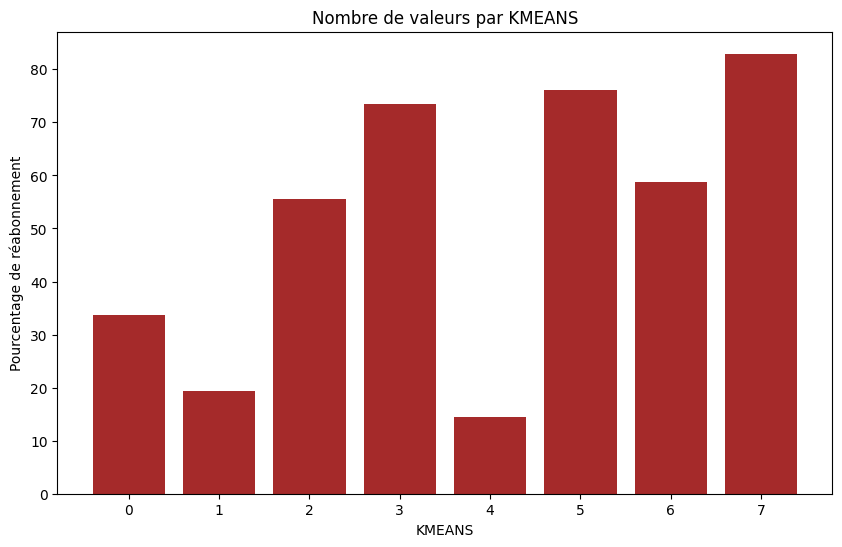

In [123]:
merged_df = pd.merge(donneesp, total1, on='KMEANS', how='left')
merged_df['Percentage'] = (merged_df['ID_ABONNE_x'] / merged_df['ID_ABONNE_y']) * 100

plt.figure(figsize=(10, 6))
plt.bar(merged_df['KMEANS'], merged_df['Percentage'], color='brown')
plt.xlabel('KMEANS')
plt.ylabel('Pourcentage de réabonnement')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(merged_df['KMEANS'])
plt.show()

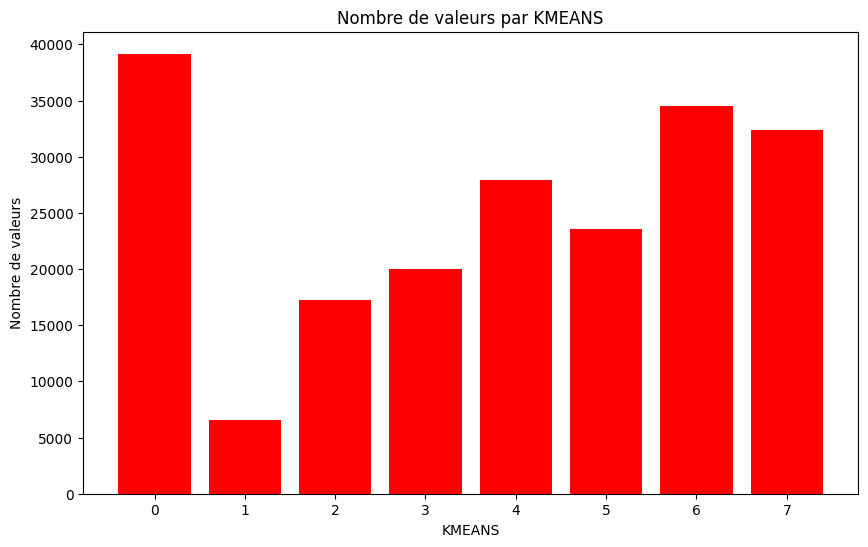

In [124]:
rep_odd = join_dataFrames(odd, cluster_id_all, 'ID_ABONNE')
liste = rep_odd.groupby(['KMEANS']).count()
donnees_odd = pd.DataFrame(liste)
donnees_odd['KMEANS2'] = donnees_odd.index

plt.figure(figsize=(10, 6))
plt.bar(donnees_odd['KMEANS2'], donnees_odd['ID_ABONNE'], color='red')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_odd['KMEANS2'])
plt.show()

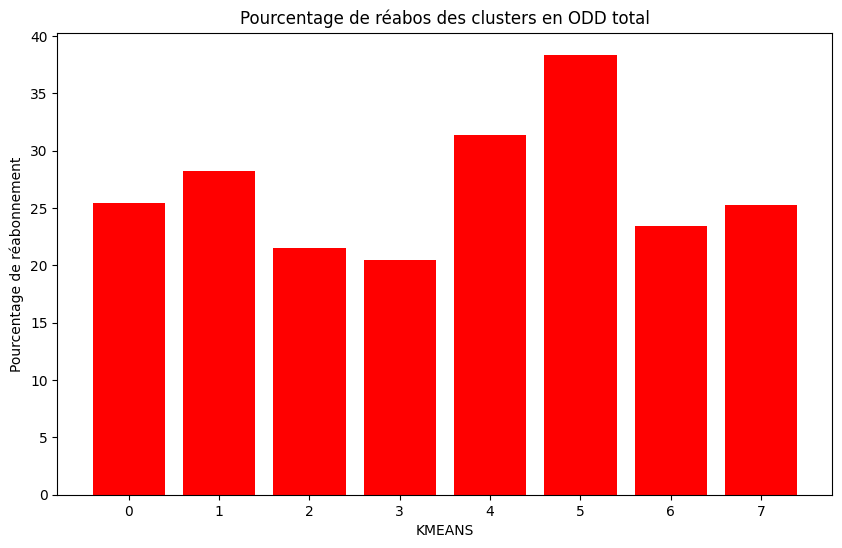

In [138]:
merged_df = pd.merge(donnees_odd, total2, on='KMEANS2', how='left')
merged_df['Percentage'] = (merged_df['ID_ABONNE_x'] / merged_df['ID_ABONNE_y']) * 100

plt.figure(figsize=(10, 6))
plt.bar(merged_df['KMEANS2'], merged_df['Percentage'], color='red')
plt.xlabel('KMEANS')
plt.ylabel('Pourcentage de réabonnement')
plt.title('Pourcentage de réabos des clusters en ODD total')
plt.xticks(merged_df['KMEANS2'])
plt.show()

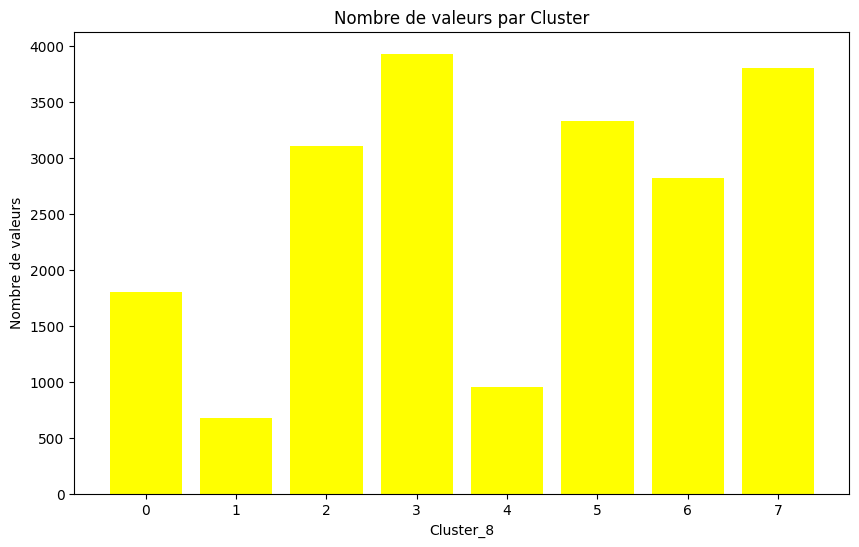

In [126]:
rep_odd_p = join_dataFrames(odd, cluster_id, 'ID_ABONNE')
liste = rep_odd_p.groupby(['Cluster_8']).count()
donnees_odd_p = pd.DataFrame(liste)
donnees_odd_p['KMEANS'] = donnees_odd_p.index
plt.figure(figsize=(10, 6))
plt.bar(donnees_odd_p['KMEANS'], donnees_odd_p['ID_ABONNE'], color='yellow')
plt.xlabel('Cluster_8')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par Cluster')
plt.xticks(donnees_odd_p['KMEANS'])
plt.show()


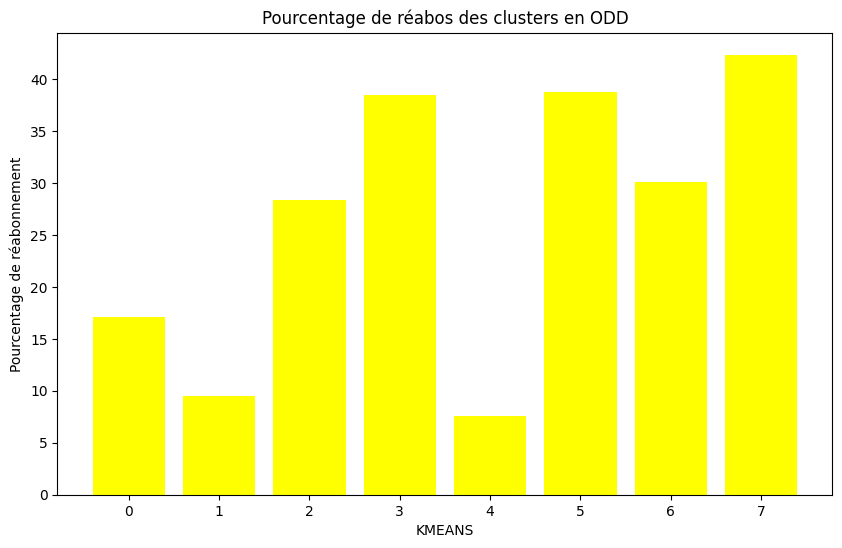

In [145]:
merged_odd_p = pd.merge(donnees_odd_p, total1, on='KMEANS', how='left')
merged_odd_p['Percentage'] = (merged_odd_p['ID_ABONNE_x'] / merged_odd_p['ID_ABONNE_y']) * 100

plt.figure(figsize=(10, 6))
plt.bar(merged_odd_p['KMEANS'], merged_odd_p['Percentage'], color='yellow')
plt.xlabel('KMEANS')
plt.ylabel('Pourcentage de réabonnement')
plt.title('Pourcentage de réabos des clusters en ODD')
plt.xticks(merged_odd_p['KMEANS'])
plt.show()

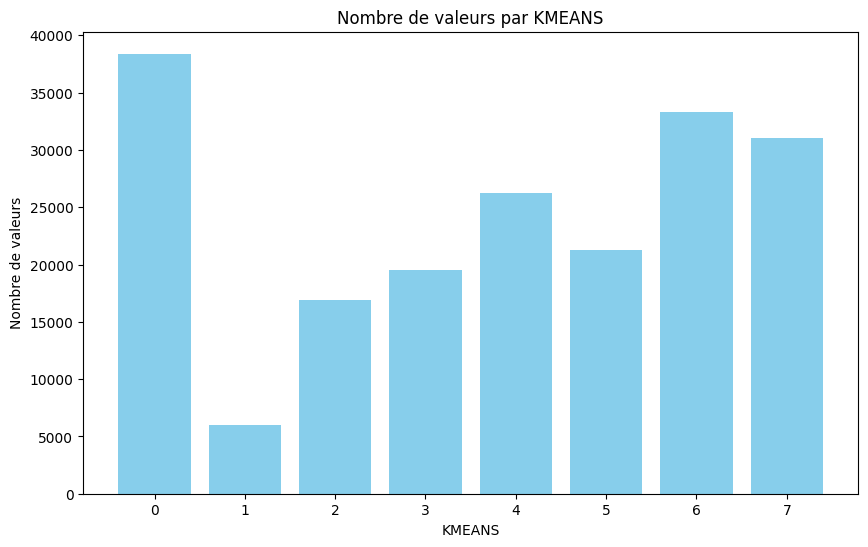

In [128]:
rep_sg = join_dataFrames(sg, cluster_id_all, 'ID_ABONNE')
liste = rep_sg.groupby(['KMEANS']).count()
donnees_sg = pd.DataFrame(liste)
donnees_sg['KMEANS2'] = donnees_sg.index

plt.figure(figsize=(10, 6))
plt.bar(donnees_sg['KMEANS2'], donnees_sg['ID_ABONNE'], color='skyblue')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_sg['KMEANS2'])
plt.show()

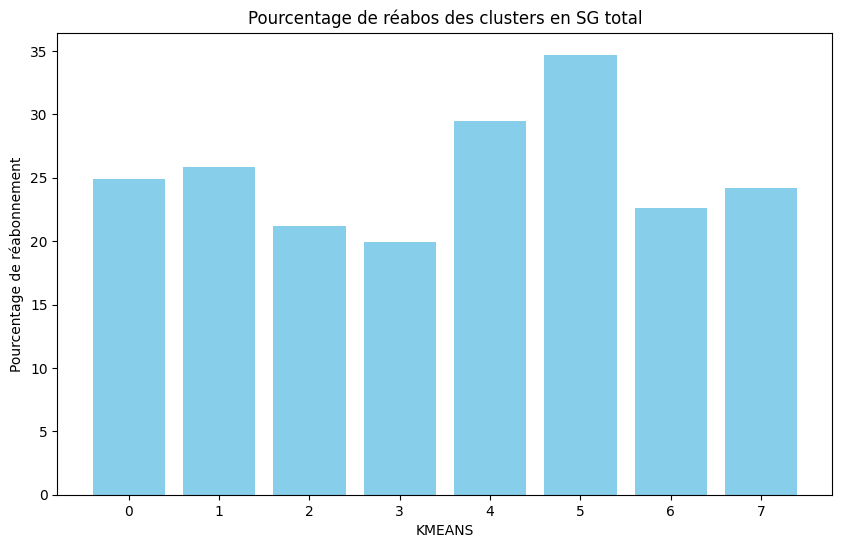

In [139]:
merged_sg = pd.merge(donnees_sg, total2, on='KMEANS2', how='left')
merged_sg['Percentage'] = (merged_sg['ID_ABONNE_x'] / merged_sg['ID_ABONNE_y']) * 100

plt.figure(figsize=(10, 6))
plt.bar(merged_sg['KMEANS2'], merged_sg['Percentage'], color='skyblue')
plt.xlabel('KMEANS')
plt.ylabel('Pourcentage de réabonnement')
plt.title('Pourcentage de réabos des clusters en SG total')
plt.xticks(merged_sg['KMEANS2'])
plt.show()

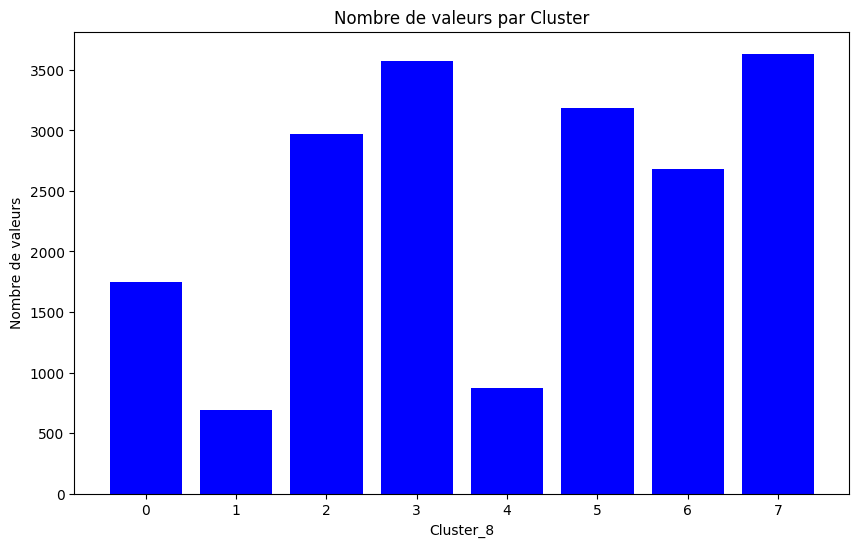

In [131]:
rep_sg_p = join_dataFrames(sg, cluster_id, 'ID_ABONNE')
liste = rep_sg_p.groupby(['Cluster_8']).count()
donnees_sg_p = pd.DataFrame(liste)
donnees_sg_p['KMEANS'] = donnees_sg_p.index
plt.figure(figsize=(10, 6))
plt.bar(donnees_sg_p['KMEANS'], donnees_sg_p['ID_ABONNE'], color='blue')
plt.xlabel('Cluster_8')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par Cluster')
plt.xticks(donnees_sg_p['KMEANS'])
plt.show()


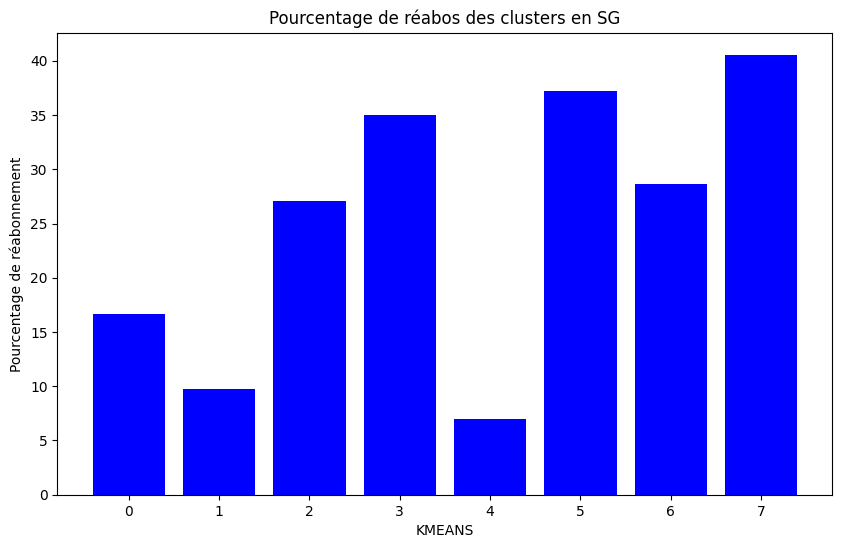

In [146]:
merged_sg_p = pd.merge(donnees_sg_p, total1, on='KMEANS', how='left')
merged_sg_p['Percentage'] = (merged_sg_p['ID_ABONNE_x'] / merged_sg_p['ID_ABONNE_y']) * 100

plt.figure(figsize=(10, 6))
plt.bar(merged_sg_p['KMEANS'], merged_sg_p['Percentage'], color='blue')
plt.xlabel('KMEANS')
plt.ylabel('Pourcentage de réabonnement')
plt.title('Pourcentage de réabos des clusters en SG')
plt.xticks(merged_sg_p['KMEANS'])
plt.show()

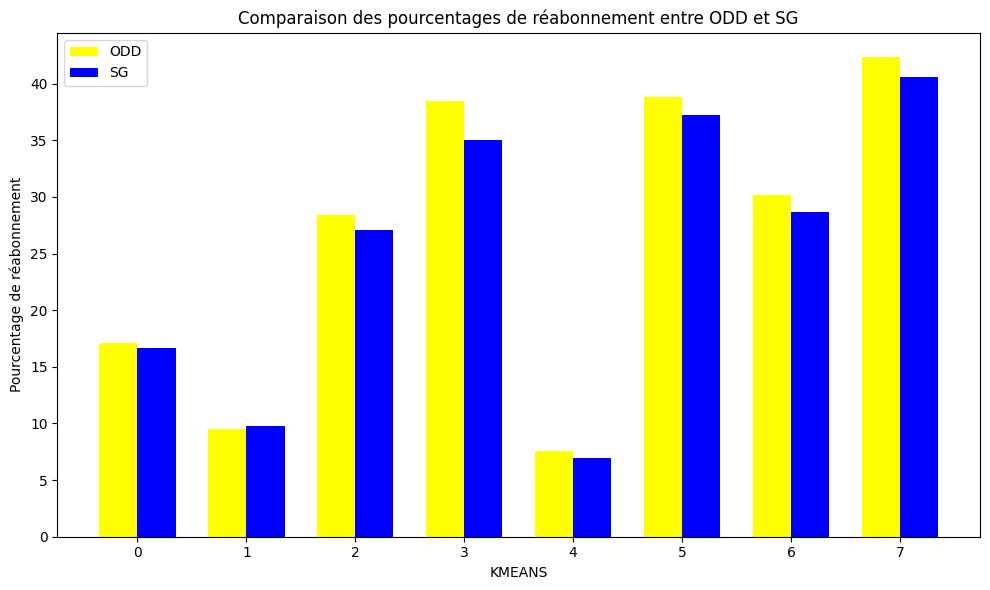

In [147]:
bar_width = 0.35

# Position des barres pour les données ODD
bar_positions_odd = np.arange(len(merged_df))
# Position des barres pour les données SG (décalées de la largeur des barres)
bar_positions_sg = bar_positions_odd + bar_width

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracé des barres pour les données ODD
plt.bar(bar_positions_odd, merged_odd_p['Percentage'], bar_width, color='yellow', label='ODD')
# Tracé des barres pour les données SG
plt.bar(bar_positions_sg, merged_sg_p['Percentage'], bar_width, color='blue', label='SG')

# Étiquetage des axes et du titre
plt.xlabel('KMEANS')
plt.ylabel('Pourcentage de réabonnement')
plt.title('Comparaison des pourcentages de réabonnement entre ODD et SG')
plt.xticks(bar_positions_odd + bar_width / 2, merged_df['KMEANS'])
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()